# Problem Statement: To analyze what makes us happy and to create models that can predit happiness score.

## Souce of Data: Kaggle

In [1]:
# import cell
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import matplotlib.pyplot as plt
from dmba import regressionSummary, exhaustive_search
%matplotlib inline

no display found. Using non-interactive Agg backend


## Exploratory Analysis
#### I am going to want to combine the datasets and create visuals to find correlation to happiness

In [2]:
df19 = pd.read_csv('/Users/marcmaestri/Downloads/archive-5/2019.csv')
df18 = pd.read_csv('/Users/marcmaestri/Downloads/archive-5/2018.csv')
df17 = pd.read_csv('/Users/marcmaestri/Downloads/archive-5/2017.csv')
df16 = pd.read_csv('/Users/marcmaestri/Downloads/archive-5/2016.csv')
df15a = pd.read_csv('/Users/marcmaestri/Downloads/archive-5/2015.csv')
df15a.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [3]:
df16.head(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [4]:
df17.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [5]:
df18.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


In [6]:
df19.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [7]:
print(df15a.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [8]:
print(df16.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')


In [9]:
print(df17.columns)

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')


In [10]:
print(df18.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [11]:
print(df19.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [12]:
#Reduce set to common columns
df15=df15a[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
df16=df16[['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']]
df17=df17[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.']]
df18=df18[['Country or region','Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
df19=df19[['Country or region','Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]

In [13]:
#Create names of columns
new_col = ['Country', 'Happiness_Rank', 'Happiness_Score', 'GDP', 'Family',
       'Life_Expectancy', 'Freedom', 'Government_Corruption',
       'Generosity']
#Put new names into sets
df15.columns = new_col
df16.columns = new_col
df17.columns = new_col
df18.columns = new_col
df19.columns = new_col
#Add a year column
df15['Year'] = 2015
df16['Year'] = 2016
df17['Year'] = 2017
df18['Year'] = 2018
df19['Year'] = 2019
#Merge these into one df
df = pd.concat([df15, df16, df17, df18, df19], axis=0)
df.head(10)

/var/folders/d2/0sg9sl1s5_37sqmwbnswqmx40000gn/T/ipykernel_57073/3223752774.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15['Year'] = 2015


,Country,Happiness_Rank,Happiness_Score,GDP,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


In [14]:
df.tail(10)

,Country,Happiness_Rank,Happiness_Score,GDP,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Year
146,Haiti,147,3.597,0.323,0.688,0.449,0.026,0.110,0.419,2019
147,Botswana,148,3.488,1.041,1.145,0.538,0.455,0.100,0.025,2019
148,Syria,149,3.462,0.619,0.378,0.440,0.013,0.141,0.331,2019
149,Malawi,150,3.410,0.191,0.560,0.495,0.443,0.089,0.218,2019
150,Yemen,151,3.380,0.287,1.163,0.463,0.143,0.077,0.108,2019
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217,2019
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276,2019
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,2019
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,2019
155,South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.091,0.202,2019


In [15]:
print(df.shape)

(782, 10)


In [16]:
df.describe

<bound method NDFrame.describe of                       Country  Happiness_Rank  Happiness_Score      GDP  \
0                 Switzerland               1            7.587  1.39651   
1                     Iceland               2            7.561  1.30232   
2                     Denmark               3            7.527  1.32548   
3                      Norway               4            7.522  1.45900   
4                      Canada               5            7.427  1.32629   
..                        ...             ...              ...      ...   
151                    Rwanda             152            3.334  0.35900   
152                  Tanzania             153            3.231  0.47600   
153               Afghanistan             154            3.203  0.35000   
154  Central African Republic             155            3.083  0.02600   
155               South Sudan             156            2.853  0.30600   

      Family  Life_Expectancy  Freedom  Government_Corruption  Ge

## Visualizations

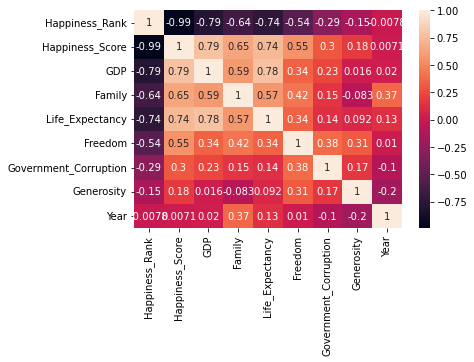

In [17]:
#Heat correlation map
#happiness score has highest correlation with GDP, life expectancy, and family
sns.heatmap(df.corr(), annot = True)
plt.show()

/Users/marcmaestri/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

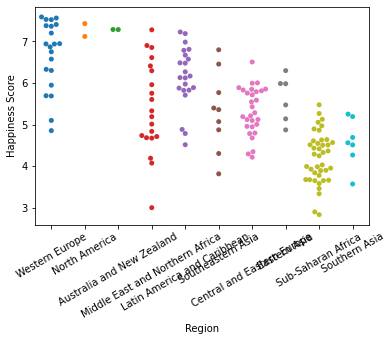

In [18]:
#create plot to show happiness score by region
sns.swarmplot(x="Region", y="Happiness Score",  data=df15a)
plt.xticks(rotation=30)

/Users/marcmaestri/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

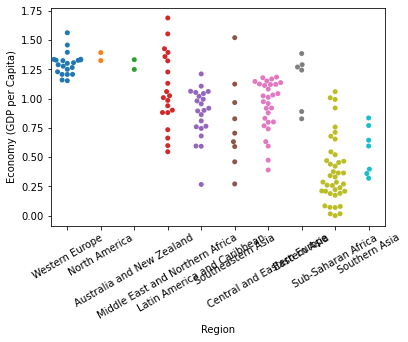

In [19]:
#create plot to show happiness score by gdp
sns.swarmplot(x="Region", y="Economy (GDP per Capita)",  data=df15a)
plt.xticks(rotation=30)

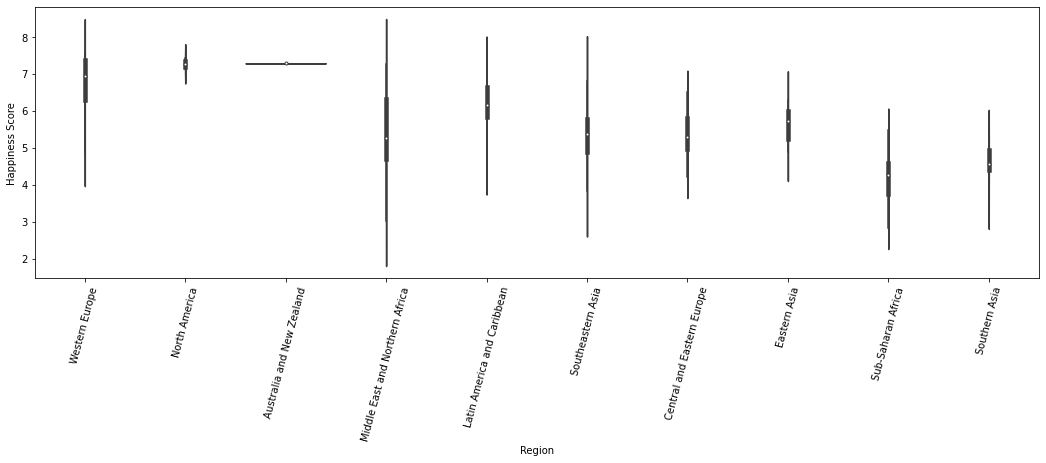

In [20]:
#create violin plot to show happiness score by region
plt.figure(figsize=(18,5))
sns.violinplot(x=df15a['Region'],y=df15a['Happiness Score'])
plt.xticks(rotation=75)
plt.show()

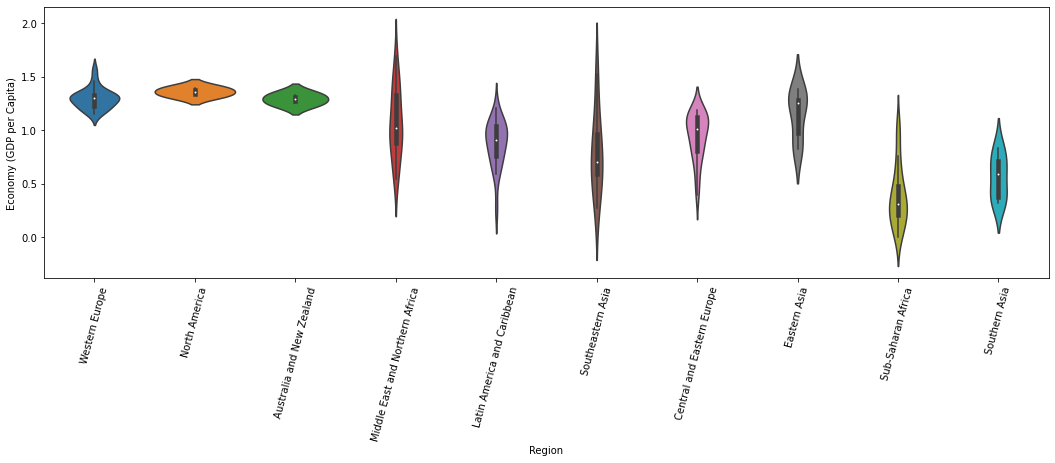

In [21]:
#create violin plot to show happiness score by gdp
plt.figure(figsize=(18,5))
sns.violinplot(x=df15a['Region'],y=df15a['Economy (GDP per Capita)'])
plt.xticks(rotation=75)
plt.show()

## Model Building
#### Linear regression, ridge, lasso

In [22]:
#filling nulls so model works
df=df.fillna(df.Government_Corruption.mean())
df.isnull().sum()

Country                  0
Happiness_Rank           0
Happiness_Score          0
GDP                      0
Family                   0
Life_Expectancy          0
Freedom                  0
Government_Corruption    0
Generosity               0
Year                     0
dtype: int64

In [23]:
#partition
y = df['Happiness_Score']
X = df.drop(columns=['Country', 'Happiness_Rank', 'Happiness_Score'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.40, random_state=33)

# Build the linear regression model
#
happy_lm = LinearRegression()
happy_lm.fit(train_X, train_y)

# Regression coefficients
#
print('intercept ', happy_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': happy_lm.coef_}))

# Accuracy Metrics for the Regression Model

# Performance measures
regressionSummary(train_y, happy_lm.predict(train_X))

intercept  183.7561603823211
               Predictor  coefficient
0                    GDP     1.034220
1                 Family     0.778876
2        Life_Expectancy     1.109621
3                Freedom     1.632025
4  Government_Corruption     0.192466
5             Generosity     0.705418
6                   Year    -0.090064

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.5019
            Mean Absolute Error (MAE) : 0.3961
          Mean Percentage Error (MPE) : -0.9152
Mean Absolute Percentage Error (MAPE) : 7.7160


In [24]:
# Use predict() to make predictions on a new set
happy_lm_pred = happy_lm.predict(test_X)

result = pd.DataFrame({'Predicted': happy_lm_pred, 'Actual': test_y, 'Residual': test_y - happy_lm_pred})
print(result.head(10))


# Performance measures
regressionSummary(train_y, happy_lm.predict(train_X))

     Predicted  Actual  Residual
19    6.146866   6.774  0.627134
75    3.755567   5.440  1.684433
67    5.494222   5.560  0.065778
105   5.220323   4.722 -0.498323
85    5.962493   5.230 -0.732493
92    5.244084   5.129 -0.115084
121   4.344164   4.512  0.167836
99    5.700606   4.933 -0.767606
3     7.071791   7.495  0.423209
31    6.414375   6.485  0.070625

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.5019
            Mean Absolute Error (MAE) : 0.3961
          Mean Percentage Error (MPE) : -0.9152
Mean Absolute Percentage Error (MAPE) : 7.7160


In [25]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=33)

#define model
happy_R = Ridge()

#fit model
happy_R.fit(X, y)


print('intercept ', happy_R.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': happy_R.coef_}))

# Accuracy Metrics for the Regression Model
#
# Performance measures
regressionSummary(train_y, happy_R.predict(train_X))

intercept  164.97834324788522
               Predictor  coefficient
0                    GDP     1.086483
1                 Family     0.842740
2        Life_Expectancy     1.022430
3                Freedom     1.369559
4  Government_Corruption     0.403189
5             Generosity     0.776222
6                   Year    -0.080766

Regression statistics

                      Mean Error (ME) : 0.0233
       Root Mean Squared Error (RMSE) : 0.5041
            Mean Absolute Error (MAE) : 0.3969
          Mean Percentage Error (MPE) : -0.4751
Mean Absolute Percentage Error (MAPE) : 7.6946


In [26]:
# Use predict() to make predictions on a new set
happy_R_pred = happy_R.predict(test_X)

result = pd.DataFrame({'Predicted': happy_R_pred, 'Actual': test_y, 'Residual': test_y - happy_R_pred})
print(result.head(10))


# Performance measures
regressionSummary(train_y, happy_R.predict(train_X))

     Predicted  Actual  Residual
19    6.203469   6.774  0.570531
75    3.670079   5.440  1.769921
67    5.487489   5.560  0.072511
105   5.229559   4.722 -0.507559
85    5.937159   5.230 -0.707159
92    5.222145   5.129 -0.093145
121   4.246977   4.512  0.265023
99    5.688250   4.933 -0.755250
3     7.029347   7.495  0.465653
31    6.343864   6.485  0.141136

Regression statistics

                      Mean Error (ME) : 0.0233
       Root Mean Squared Error (RMSE) : 0.5041
            Mean Absolute Error (MAE) : 0.3969
          Mean Percentage Error (MPE) : -0.4751
Mean Absolute Percentage Error (MAPE) : 7.6946


In [27]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=33)

#define model
happy_L = LassoCV()

#fit model
happy_L.fit(X, y)

print('intercept ', happy_L.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': happy_L.coef_}))

# Accuracy Metrics for the Regression Model
#
# Performance measures
regressionSummary(train_y, happy_L.predict(train_X))

intercept  164.26580655714378
               Predictor  coefficient
0                    GDP     1.155335
1                 Family     0.785076
2        Life_Expectancy     0.914471
3                Freedom     1.381758
4  Government_Corruption     0.000000
5             Generosity     0.373132
6                   Year    -0.080314

Regression statistics

                      Mean Error (ME) : 0.0214
       Root Mean Squared Error (RMSE) : 0.5088
            Mean Absolute Error (MAE) : 0.4034
          Mean Percentage Error (MPE) : -0.6043
Mean Absolute Percentage Error (MAPE) : 7.7883


In [28]:
# Use predict() to make predictions on a new set
happy_L_pred = happy_L.predict(test_X)

result = pd.DataFrame({'Predicted': happy_L_pred, 'Actual': test_y, 'Residual': test_y - happy_L_pred})
print(result.head(10))


# Performance measures
regressionSummary(train_y, happy_L.predict(train_X))

     Predicted  Actual  Residual
19    6.298079   6.774  0.475921
75    3.608248   5.440  1.831752
67    5.543218   5.560  0.016782
105   5.297104   4.722 -0.575104
85    5.952884   5.230 -0.722884
92    5.256861   5.129 -0.127861
121   4.222300   4.512  0.289700
99    5.770908   4.933 -0.837908
3     6.938033   7.495  0.556967
31    6.272310   6.485  0.212690

Regression statistics

                      Mean Error (ME) : 0.0214
       Root Mean Squared Error (RMSE) : 0.5088
            Mean Absolute Error (MAE) : 0.4034
          Mean Percentage Error (MPE) : -0.6043
Mean Absolute Percentage Error (MAPE) : 7.7883


In [29]:
# linear regression had the smallest RMSE 9by a small margin).
#i want to run again with only the varibales with high coff... GDP, family, life ex.

y = df['Happiness_Score']
X = df.drop(columns=['Happiness_Rank', 'Happiness_Score', 'Country','Freedom', 'Government_Corruption',
       'Generosity'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.40, random_state=33)

# Build the linear regression model
#
happy_lm2 = LinearRegression()
happy_lm2.fit(train_X, train_y)

# Regression coefficients
#
print('intercept ', happy_lm2.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': happy_lm2.coef_}))

# Accuracy Metrics for the Regression Model
#
# Performance measures
regressionSummary(train_y, happy_lm2.predict(train_X))

intercept  262.01374536858134
         Predictor  coefficient
0              GDP     1.017536
1           Family     1.107157
2  Life_Expectancy     1.296886
3             Year    -0.128676

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.5662
            Mean Absolute Error (MAE) : 0.4540
          Mean Percentage Error (MPE) : -1.1213
Mean Absolute Percentage Error (MAPE) : 8.7416


In [30]:
# Use predict() to make predictions on a new set
happy_lm2_pred = happy_lm2.predict(test_X)

result = pd.DataFrame({'Predicted': happy_lm2_pred, 'Actual': test_y, 'Residual': test_y - happy_lm2_pred})
print(result.head(10))


# Performance measures
regressionSummary(train_y, happy_lm2.predict(train_X))

     Predicted  Actual  Residual
19    6.206569   6.774  0.567431
75    3.123947   5.440  2.316053
67    5.723795   5.560 -0.163795
105   5.297914   4.722 -0.575914
85    5.870965   5.230 -0.640965
92    5.453346   5.129 -0.324346
121   4.165981   4.512  0.346019
99    6.018955   4.933 -1.085955
3     6.717817   7.495  0.777183
31    6.203046   6.485  0.281954

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.5662
            Mean Absolute Error (MAE) : 0.4540
          Mean Percentage Error (MPE) : -1.1213
Mean Absolute Percentage Error (MAPE) : 8.7416


#### Able to predict the happiness score within about 0.5 of the score. It is an okay prediction